<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/04_Annotating_Images_and_Text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Annotating Images</h1>

In this notebook we will demonstrate how to annotate images using OpenCV. We will learn how to perform the following annotations to images.

* Draw lines
* Draw circles
* Draw rectangles
* Add text

These are useful when you want to annotate your results for presentations or show a demo of your application. Annotations can also be useful during development and debugging. Videos can also be annotated as we will see in future modules.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/8mu8erfnvqk3dzu/AABWmDJkjv-TvECMPRKlufNYa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  31.27M  21.1MB/s    in 1.5s    
mapname:  conversion of  failed


# 1. Read Grayscale Image as "Color"

Let's start by reading and displaying an image that we wish to annotate. We selected a grayscale image for this example, but notice that we are using **`cv2.IMREAD_COLOR`** to read the image as a color image. Why is that? If we wish to annotate this image with color, then the image must support a color representation, even though the original image is a grayscale image. The image itself could be rendered as a single channel grayscale image or as a color image (with grayscale "color" values). In both cases, the displayed image will appear identical (as a pure grayscale image).

To better understand this let's consider the pixel intensity of a specific point in the gray sky. Let's assume the intensity value at [10,101] is 160. So if we read this image as a grayscale image (single channel) then the sky would have a pixel intensity of 160. If we read this image as a color image (three channels) then the pixel intensity at the same point would be represented as (160,160,160). The three channels have identical values and thus give rise to the same grayscale color as the single-channel representation. But singe the image data now contains three color channels it allows us to annotate this image with color!

(480, 600, 3)


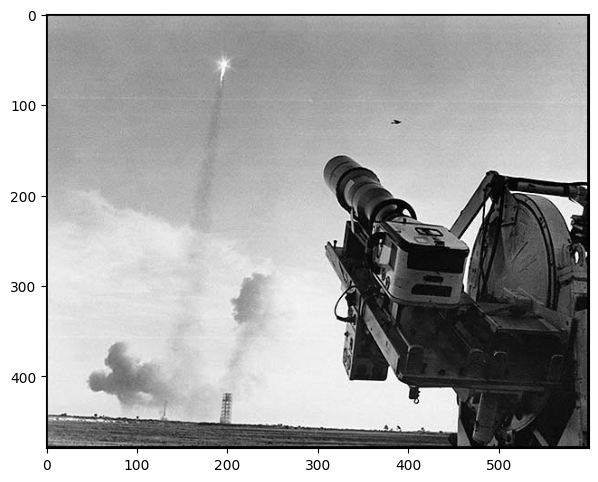

In [3]:
# Read the image.
image = cv2.imread('Apollo-8-Launch.jpg', cv2.IMREAD_COLOR)

# Display the original image.
plt.figure(figsize = [7, 7])
plt.imshow(image);
print(image.shape)

### <font style="color:rgb(50,120,230)">Define colors for annotations</font>

In [4]:
yellow  = (0, 255, 255)
red     = (0, 0, 255)
magenta = (255, 0, 255)
green   = (0, 255, 0)

# 2. Drawing a Line

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The **`line()`** function in OpenCV is used to draw lines on images.

### <font color="green">Function Syntax</font>
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

**`img`**: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line
2. `pt1`:   First point (x, y) location of the line segment
3. `pt2`:   Second point of the line segment
4. `color`: Color of the line which will be drawn
    
Optional arguments that are commonly used include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.
2. `lineType`:  Type of the line. Default value is **`cv2.LINE_8`** which stands for an 8-connected line. Usually, **`cv2.LINE_AA`** (antialiased or smooth line) is used for the lineType.
    
### <font color="green">OpenCV Documentation</font>

[**`line()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2)
[**`linetype`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(50,120,230)"> Using: cv2.LINE_8 </font>

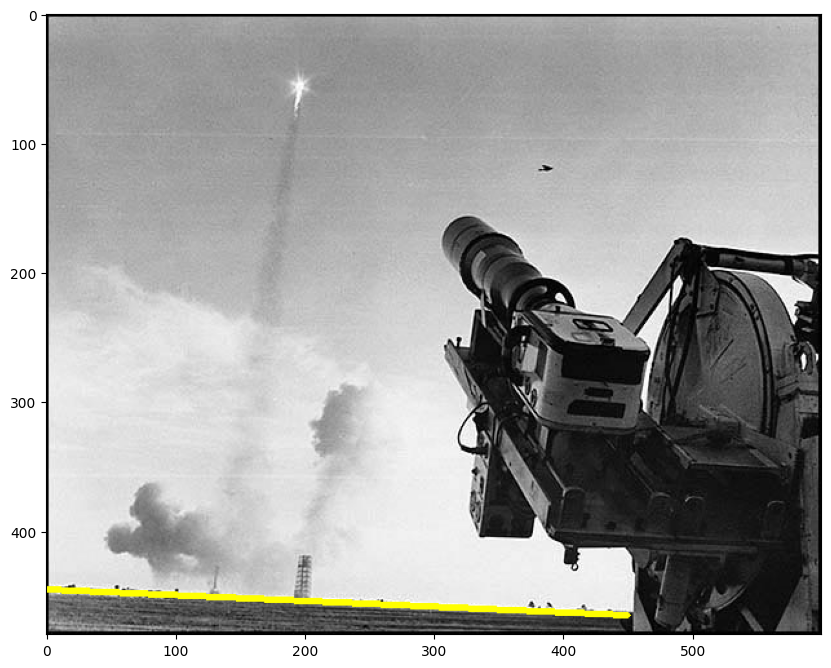

In [5]:
# Make a copy of the original image.
image_line = image.copy()

# Draw a yellow line (using: cv2.LINE_8)
image_line = cv2.line(image_line, (0, 445), (450, 465), yellow, thickness=3, lineType=cv2.LINE_8)

# Display the annotated image.
plt.figure(figsize = [10, 10])
plt.imshow(image_line[:, :, ::-1]);

### <font style = "color:rgb(50,120,230)"> Using: cv2.LINE_AA </font>

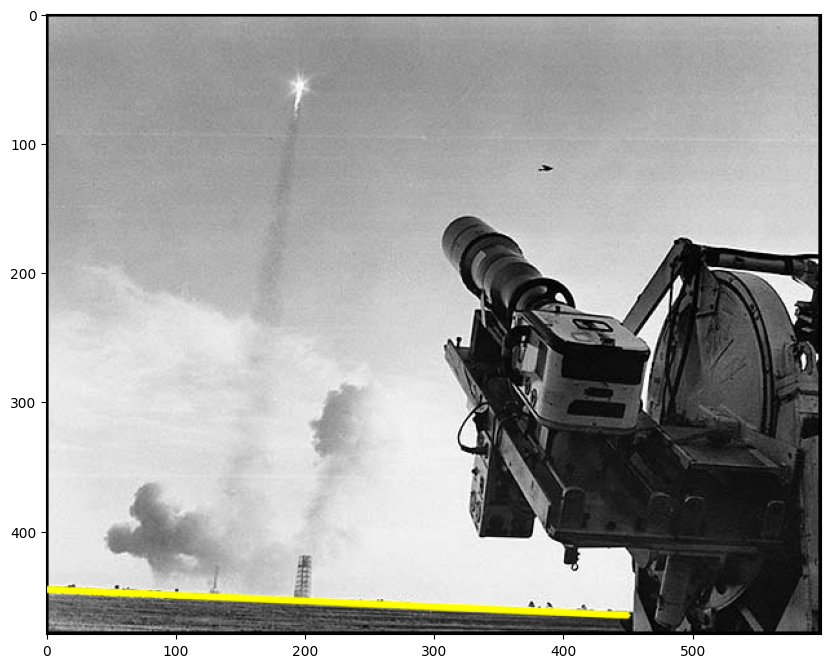

In [6]:
# Make a copy of the original image.
image_line_aa = image.copy()

# Draw a yellow line (using: cv2.LINE_AA)
image_line_aa = cv2.line(image_line_aa, (0, 445), (450, 465), yellow, thickness=3, lineType=cv2.LINE_AA)

# Display the annotated image.
plt.figure(figsize = [10, 10])
plt.imshow(image_line_aa[:, :, ::-1]);

# 3. Drawing a Circle

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The **`circle()`** function in OpenCV is used to draw circles on images.

### <font color="green">Function Syntax</font>
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line
2. `center`: Center of the circle
3. `radius`: Radius of the circle
4. `color`:  Color of the circle which will be drawn
    
Optional arguments that are commonly used include:

1. `thickness`: Thickness of the circle outline (if positive).
If a negative value is supplied for this argument, it will result in a filled circle.
2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **`cv2.line()`**
    
### <font color="green">OpenCV Documentation</font>
    
[**`circle()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

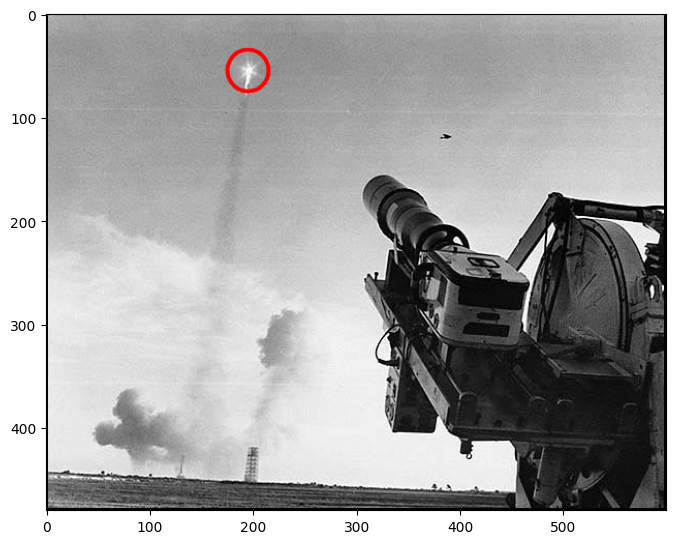

In [7]:
# Make a copy of the original image.
image_circle = image.copy()

# Draw a red circle.
image_circle = cv2.circle(image_circle, (195, 55), 20, red, thickness = 2, lineType = cv2.LINE_AA)

# Display the annotated image.
plt.figure(figsize = [8, 8])
plt.imshow(image_circle[:, :, ::-1]);

# 3. Drawing a Rectangle

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The **`rectangle()`** function in OpenCV is used to draw rectangles on images.

### <font color="green">Function Syntax</font>

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.
2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.
3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right**              vertex here.
4. `color`: Rectangle color
    
Optional arguments that are commonly used include:

1. `thickness`: Thickness of the circle outline (if positive).
    If a negative value is supplied for this argument, it will result in a filled rectangle.
2. `lineType`: Type of the circle boundary. This is exact same as lineType argument in
    **`cv2.line()`**
    
### <font color="green">OpenCV Documentation Links</font>

[**`rectangle()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

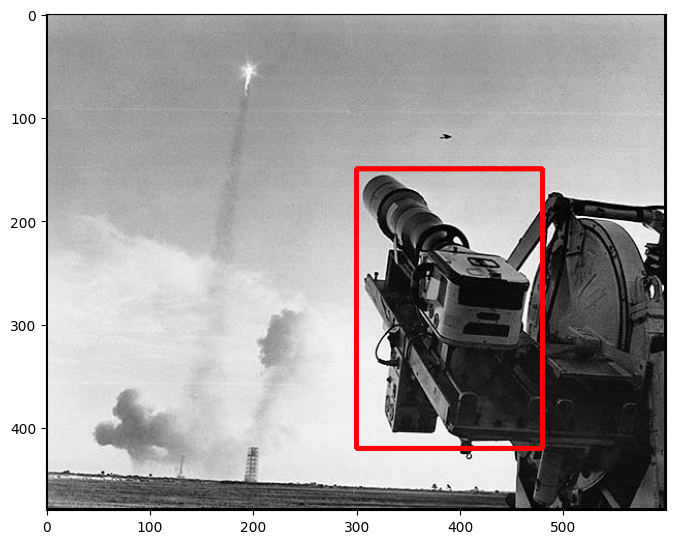

In [13]:
# Make a copy of the original image.
image_rectangle = image.copy()

# Draw a red rectangle.
image_rectangle = cv2.rectangle(image_rectangle, (300, 150), (480, 420), red, thickness = 3, lineType = cv2.LINE_8)

# Display the annotated image.
plt.figure(figsize = [8, 8])
plt.imshow(image_rectangle[:, :, ::-1]);

# 4. Adding Text

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

The **`putText()`** function in OpenCV is used to add text to images.

### <font color="green">Function Syntax</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.
2. `text`: Text string to be written.
3. `org`: Bottom-left corner of the text string in the image.
4. `fontFace`: Font type
5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.
6. `color`: Font color

Optional arguments that are commonly used include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.
2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, **`cv2.LINE_AA`** (antialiased or smooth line) is used for the lineType.

### <font color="green">OpenCV Documentation</font>

[**`putText()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [ ]:
# Make a copy of the original image.
image_text = image.copy()

# Add text to the image.
text = 'Apollo 8 Saturn V Launch, 21 Dec 1968'
font_face = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = green
font_thickness = 1

image_text = cv2.putText(image_text, text, (45, 30), font_face, font_scale, font_color, font_thickness, cv2.LINE_AA)

# Display the annotated image.
plt.figure(figsize = [10, 10])
plt.imshow(image_text[:, :, ::-1]);

# 5. Exercise
Please complete the code in the cell below.

Text(0.5, 1.0, 'HIGHLIGHTED ROCKET')

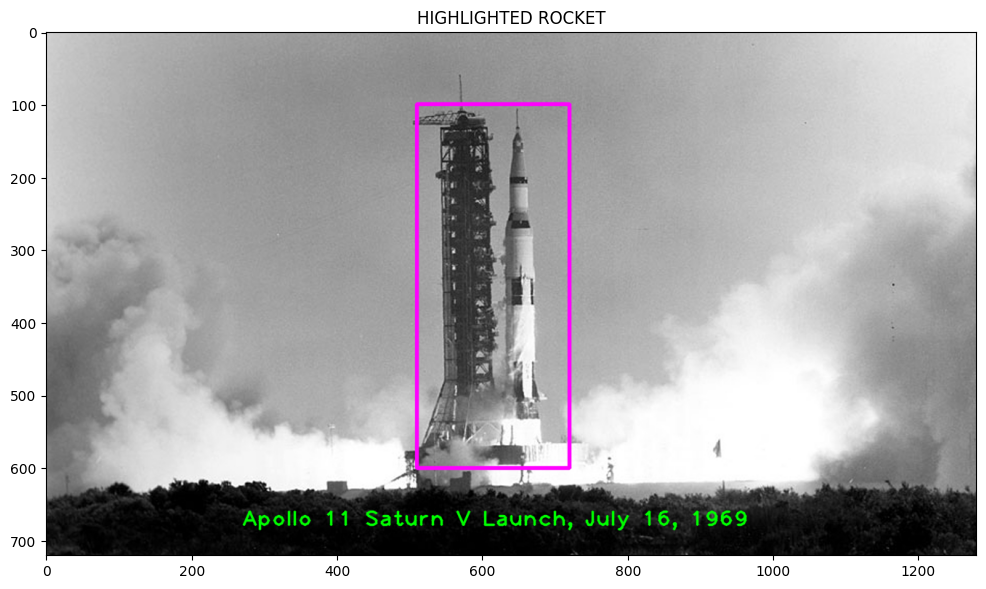

In [33]:
# Read in the image ('Apollo-11-launch.jpg').

image =cv2.imread('Apollo-11-launch.jpg',cv2.IMREAD_COLOR)

# Add the following text to the dark area at the bottom of the image (centered on the image):
# 'Apollo 11 Saturn V Launch, July 16, 1969'.
text = 'Apollo 11 Saturn V Launch, July 16, 1969'
font_face = cv2.FONT_HERSHEY_PLAIN
font_scale =2

# YOUR CODE HERE: use putText()
image =cv2.putText(image,text,(270,680),font_face,font_scale,green,thickness=2,lineType=cv2.LINE_AA)
# Draw a magenta rectangle that encompasses the launch tower and the rocket.
rect_color = magenta
# YOUR CODE HERE
image =cv2.rectangle(image,(510,100),(720,600),rect_color,thickness=4,lineType=cv2.LINE_AA)
plt.figure(figsize=[12, 12])
# Display the final annotated image
plt.imshow(image[:,:,::-1]);plt.title('HIGHLIGHTED ROCKET')


Your results should look similar to this.

![c0-m1-Appolo-Exercise-01-04.png](https://opencv.org/wp-content/uploads/2021/08/c0-m1-Appolo-Exercise-01-04.png)